In [1]:
%matplotlib inline


# A demo of the Spectral Co-Clustering algorithm


This example demonstrates how to generate a dataset and bicluster it
using the Spectral Co-Clustering algorithm.

The dataset is generated using the ``make_biclusters`` function, which
creates a matrix of small values and implants bicluster with large
values. The rows and columns are then shuffled and passed to the
Spectral Co-Clustering algorithm. Rearranging the shuffled matrix to
make biclusters contiguous shows how accurately the algorithm found
the biclusters.



Automatically created module for IPython interactive environment
consensus score: 1.000


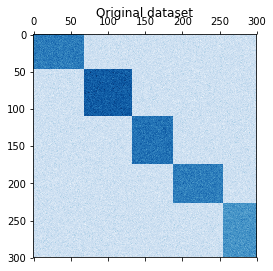

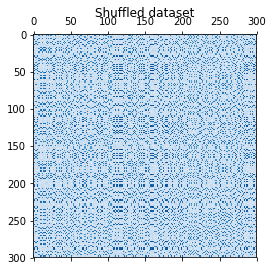

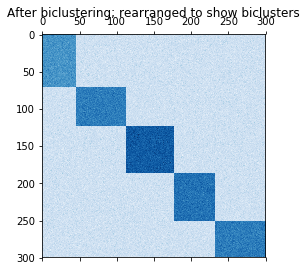

In [18]:
print(__doc__)

# Author: Kemal Eren <kemal@kemaleren.com>
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_biclusters
from sklearn.datasets import samples_generator as sg
from sklearn.cluster.bicluster import SpectralCoclustering
from sklearn.metrics import consensus_score

data, rows, columns = make_biclusters(
    shape=(300, 300), n_clusters=5, noise=5,
    shuffle=False, random_state=0)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")

data, row_idx, col_idx = sg._shuffle(data, random_state=0)
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")

model = SpectralCoclustering(n_clusters=5, random_state=0)
model.fit(data)
score = consensus_score(model.biclusters_,
                        (rows[:, row_idx], columns[:, col_idx]))

print("consensus score: {:.3f}".format(score))

fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()

In [19]:
row_idx

array([208, 188,  12, 221, 239, 136, 230, 206,  52, 108, 290,  15, 184,
       248,  22,  74, 270,  90, 229, 164, 190, 103, 124, 129, 222, 116,
       194, 286, 234, 295,  92,  66,   8, 122, 219, 150, 176, 182, 299,
         5, 223,  89,  81,  34,  55, 139, 236,  64,   7,  45,  73, 213,
       173, 106,  59, 253, 168,  26, 284, 153, 134, 145,  63, 293, 285,
       224, 252, 111,  20,  46, 156, 228, 273,  27, 144, 259,  37,  97,
       191, 135, 118, 160, 264, 214, 238,  76, 212, 225, 255, 237, 282,
        44, 272, 189, 152, 158, 101,  54, 181,  18, 281, 250, 126, 171,
        71, 227, 245, 205, 288, 215, 154, 159,  33,  83, 249,  60, 167,
       280, 110,  21,  29, 146,  16,  56,  75, 109, 175, 201, 161,   4,
        96, 166,  61,  67, 137, 198, 262, 279,  40, 268,  13, 107, 220,
         3, 157, 125,  24,  30,  77, 291, 210,  19, 254, 241, 266,  80,
        51,   2, 235, 104, 179,  86,  10, 199,  58,  41,  14, 155,  50,
       292, 233, 123, 200,  62, 187, 226, 130, 209, 260,  43, 11

In [20]:
model.row_labels_

array([1, 1, 4, 1, 0, 3, 0, 1, 2, 2, 0, 4, 1, 0, 4, 2, 0, 2, 0, 3, 1, 2, 3,
       3, 1, 3, 1, 0, 0, 0, 2, 2, 4, 3, 1, 3, 1, 1, 0, 4, 1, 2, 2, 4, 2, 3,
       0, 2, 4, 4, 2, 1, 3, 2, 2, 0, 3, 4, 0, 3, 3, 3, 2, 0, 0, 1, 0, 3, 4,
       4, 3, 0, 0, 4, 3, 0, 4, 2, 1, 3, 3, 3, 0, 1, 0, 2, 1, 1, 0, 0, 0, 4,
       0, 1, 3, 3, 2, 2, 1, 4, 0, 0, 3, 3, 2, 1, 0, 1, 0, 1, 3, 3, 4, 2, 0,
       2, 3, 0, 2, 4, 4, 3, 4, 2, 2, 2, 3, 1, 3, 4, 2, 3, 2, 2, 3, 1, 0, 0,
       4, 0, 4, 2, 1, 4, 3, 3, 4, 4, 2, 0, 1, 4, 0, 0, 0, 2, 2, 4, 0, 2, 1,
       2, 4, 1, 2, 4, 4, 3, 2, 0, 0, 3, 1, 2, 1, 1, 3, 1, 0, 4, 3, 3, 0, 1,
       3, 3, 0, 2, 1, 2, 1, 3, 4, 1, 3, 4, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0,
       3, 1, 4, 0, 3, 3, 2, 1, 2, 1, 3, 0, 0, 1, 4, 2, 1, 2, 3, 3, 3, 0, 0,
       3, 0, 2, 2, 0, 4, 3, 2, 4, 2, 3, 0, 2, 4, 3, 0, 1, 4, 2, 3, 2, 4, 0,
       0, 4, 3, 2, 0, 3, 4, 1, 3, 3, 0, 1, 4, 4, 3, 1, 0, 0, 3, 0, 1, 2, 1,
       0, 3, 0, 2, 4, 3, 0, 3, 0, 4, 1, 2, 2, 2, 0, 0, 1, 4, 1, 0, 1, 3, 4,
       3], d